<a href="https://colab.research.google.com/github/andiainundzariah/Skripsi/blob/master/Dataset5050.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#untuk menghubungkan colab ke drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd #library yg digunakan untk load data set
import numpy as np  #library yg digunakan untk load data set
import os           #library yg digunakan untk load data set serta pengolahan dlm bentuk array

import matplotlib.pyplot as plt #library untuk visualisasi data, untu mmbuat grafik
import cv2    #mengolah data citra dikenal dngn opencv

#library ini ada didlm stckt learn
from sklearn.model_selection import train_test_split  #digunakn untuk membgi data training dan dta testing
from sklearn.preprocessing import StandardScaler      #untuk mrubh skala nilainya
from sklearn.neighbors import KNeighborsClassifier    #library untk knn

#library yg dgunakan untk mnghitung nilai performa
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

import math
#library untuk mengolah data/ blm pasti 
from skimage import io
from skimage import feature

In [13]:
pneumonia_data = os.listdir('/content/drive/My Drive/Dataset/DATA5050/Pneumonia/')
print(pneumonia_data[:3])   #untuk mncetak hanya dta 3 trkhir sja
print(len(pneumonia_data)) #untuk mngethui bnyknya dt dlm vat

print('\n')
tidakPneumonia_data = os.listdir('/content/drive/My Drive/Dataset/DATA5050/Tidak Pneumonia/')
print(tidakPneumonia_data[:3])
print(len(tidakPneumonia_data))

['person9_bacteria_41.jpeg', 'person9_bacteria_40.jpeg', 'person9_bacteria_39.jpeg']
490


['IM-0655-0001.jpeg', 'IM-0652-0001-0002.jpeg', 'IM-0650-0001.jpeg']
490


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

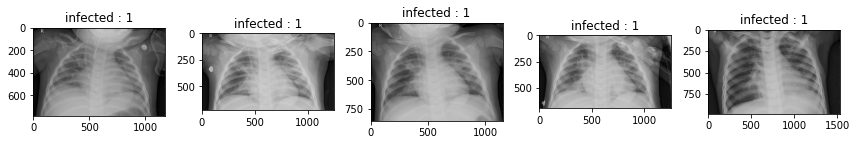

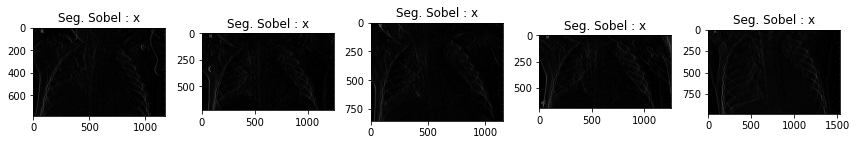

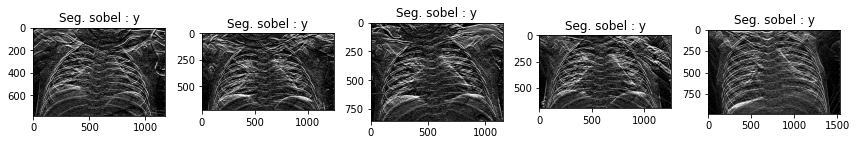

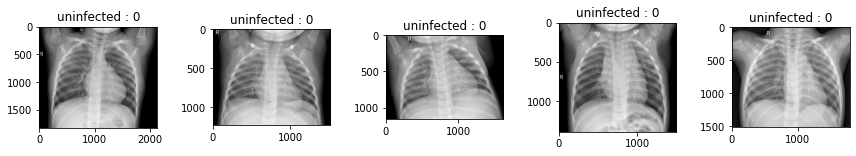

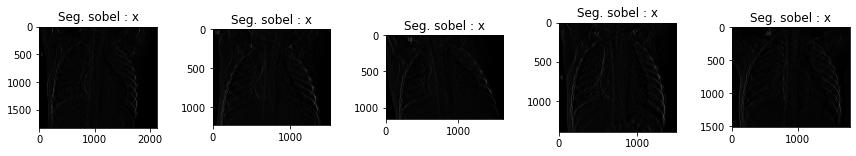

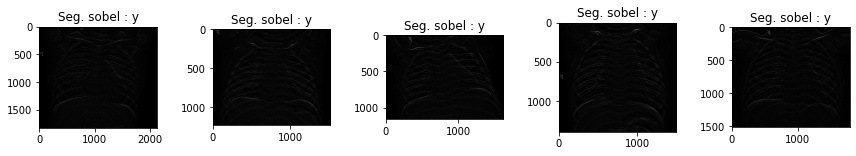

In [37]:
#Tahap ini hanya utk Visualisasi Citra Penyakit Pneumonia
#library matplotlib, hanya u/ visualisasi

#data asli pneumonia
plt.figure(figsize = (12,12))                #mengatur skala citra yg ditmpilkan dengan skala 12 12
for i in range(5):                           #melakukan perulangan sbnyk 5X (dgn nilai awal i=0 sampai i=4)
    plt.subplot(1, 5, i+1)                   #plot letak citra, librry cv2
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/Pneumonia' + "/" + pneumonia_data[i])
    plt.imshow(img)               #menanmpilkan data dlm format abu2
    plt.title('infected : 1')                  #pmbrian title, 1 itu memberikan nilai actual bahwa terinfeksi itu = 1
    plt.tight_layout()                        #tampilannya disesuaikan dgn lebar layar


#data sobel x pneumonia
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/Pneumonia' + "/" + pneumonia_data[i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)     
    edges = cv2.Sobel(img, cv2.CV_16U,1,0)           #proses segmentasi sobel 
    plt.imshow(edges)
    plt.title('Seg. Sobel : x')
    plt.tight_layout()


#data sobel y
plt.figure(figsize= (12,12))
for i in range (5):
  plt.subplot(1, 5, i+1)
  img = cv2.imread ('/content/drive/My Drive/Dataset/DATA5050/Pneumonia' + "/" +pneumonia_data[i])
  gray = cv2.cvtColor (img, cv2.COLOR_BGR2GRAY)
  edges = cv2.Sobel (img, cv2.CV_16U,0,1, ksize=5)
  plt.imshow(edges)
  plt.title ('Seg. sobel : y')
  plt.tight_layout()



#Tahap Visualisasi Citra Tidak Pneumonia
#data asli tdk pneumonia
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/Tidak Pneumonia' + "/" + tidakPneumonia_data[i])
    plt.imshow(img)
    plt.title('uninfected : 0')
    plt.tight_layout()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/Tidak Pneumonia' + "/" + tidakPneumonia_data[i])
    gray = cv2.cvtColor (img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Sobel(img, cv2.CV_16U,1,0)
    plt.imshow(edges)
    plt.title('Seg. sobel : x')
    plt.tight_layout()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/Tidak Pneumonia' + "/" + tidakPneumonia_data[i])
    gray = cv2.cvtColor (img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Sobel(img, cv2.CV_16U,0,1)
    plt.imshow(edges)
    plt.title('Seg. sobel : y')
    plt.tight_layout()
    
plt.show()

In [0]:
#SEGMENTASI SOBEL DAN EKSTRAKSI HUMOMENT

x = np.array([['H1','H2','H3','H4','H5','H6','H7','Target']])    #deklarasi var (x), isi datanya nnti sebagai header file .csv

#Proses Citra Pneumonia
for i in range(len(pneumonia_data)):
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/Pneumonia' + "/" + pneumonia_data[i])
    edges = cv2.Sobel(img,cv2.CV_16U,1,1)
    edges = cv2.cvtColor(edges, cv2.COLOR_BGR2GRAY)
    a = cv2.HuMoments(cv2.moments(edges)).flatten() #ektraksi yg dgunakan moment invariant, cv = opencv, edges var isi gmbar
    a = np.append(a,1) #np library untk mngolh data array
    x = np.vstack((x,a))

#Proses Citra Tidak Pneumonia
for i in range(len(tidakPneumonia_data)):
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/Tidak Pneumonia' + "/" + tidakPneumonia_data[i])
    edges = cv2.Sobel(img,cv2.CV_16U,1,1)
    edges = cv2.cvtColor(edges, cv2.COLOR_BGR2GRAY)
    a = cv2.HuMoments(cv2.moments(edges)).flatten()
    a = np.append(a,0)
    x = np.vstack((x,a))

In [0]:
#EXPORT to CSV
np.savetxt("/content/drive/My Drive/Dataset/DATA5050/DatasetPneumonia5050_16U_XY.csv", x, fmt='%s',delimiter=',' )

In [43]:
#LOAD CSV DATASET

dataset = pd.read_csv('/content/drive/My Drive/Dataset/DATA5050/DatasetPneumonia5050_16U_X.csv')
print (len(dataset))
print (dataset)

980
           H1            H2            H3  ...            H6            H7  Target
0    0.032506  1.556410e-04  8.508706e-07  ...  4.681093e-09 -1.006004e-13     1.0
1    0.035224  3.103605e-04  1.916525e-06  ...  3.430058e-08  6.693668e-13     1.0
2    0.032911  1.070613e-04  2.273257e-06  ...  1.011521e-08  4.188081e-15     1.0
3    0.034962  4.369325e-04  1.208371e-06  ...  1.368892e-08 -1.290872e-13     1.0
4    0.026593  8.681168e-05  3.526851e-07  ...  1.612880e-09  8.727384e-15     1.0
..        ...           ...           ...  ...           ...           ...     ...
975  0.021168  2.703778e-05  4.369531e-08  ...  2.299010e-10  4.772314e-16     0.0
976  0.027362  1.536767e-06  8.636896e-08  ...  5.540244e-11  8.012755e-16     0.0
977  0.021855  2.661302e-08  1.465910e-07  ... -3.092877e-12  1.070386e-15     0.0
978  0.021156  1.857841e-05  3.294524e-07  ...  2.271355e-10 -2.398389e-15     0.0
979  0.020502  3.158972e-06  1.117927e-07  ...  3.339132e-11 -1.749942e-16     0.0


In [0]:
#split target and attribute (membagi data)
x = dataset.iloc[:, 0:7] #mulai dr colmn index ke0, sbnyk 7 kolom(H1-H7) msuk ke var (X) untuk split data
y = dataset.iloc[:, 7] #hny kolom index ke7 yg msuk ke var (Y)


#split train n test dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0, test_size=0.1)

print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

print(len(dataset))
x

IndexError: ignored

0.0    452
1.0    448
Name: Target, dtype: int64
1.0    52
0.0    48
Name: Target, dtype: int64


Text(0.5, 1.0, 'TESTING')

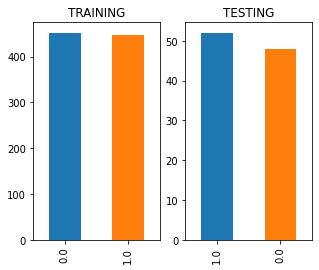

In [0]:
print(y_train.value_counts()) #mnmpilkn jum.data y_train brdsrkn value        

print(y_test.value_counts())  #mnmpilkn jum.data y_test brdsrkn value


plt.figure(figsize=(5,4)) #mngtur ukuran skla grafik

#mnmpilkn visualisasi grafik
plt.subplot(1,2,1);y_train.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);plt.title('TRAINING')
plt.subplot(1,2,2);y_test.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);plt.title('TESTING')

In [0]:
#scaling data
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)

x_test = sc_x.transform(x_test)
x_train

/usr/local/lib/python3.6/dist-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


array([[-0.00526268, -0.04658809, -0.04579614, ..., -0.        ,
        -0.01462807, -0.        ],
       [-0.00526268, -0.04658809, -0.04579614, ..., -0.        ,
        -0.01462807, -0.        ],
       [-0.00526268, -0.04658809, -0.04579614, ..., -0.        ,
        -0.01462807, -0.        ],
       ...,
       [-0.00526268, -0.04658809, -0.04579614, ..., -0.        ,
        -0.01462807, -0.        ],
       [-0.00526268, -0.04658809, -0.04579614, ..., -0.        ,
        -0.01462807, -0.        ],
       [-0.00526268, -0.04658809, -0.04579614, ..., -0.        ,
        -0.01462807, -0.        ]])

In [0]:
math.sqrt(len(y_train))

30.0

In [0]:
#choose method knn and fitting
classifier = KNeighborsClassifier(n_neighbors=38450,p=2,metric='euclidean')
classifier.fit (x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=38450, p=2,
                     weights='uniform')

In [0]:
#proses testing

#hasil prediksi/testing dismpn ke (y_pred)
y_pred = classifier.predict(x_test)
y_pred

ValueError: ignored

In [0]:
#print result
cm = confusion_matrix(y_test, y_pred)
print (cm)
print("Akurasi :" , accuracy_score(y_test, y_pred))
print("presisi :" , precision_score(y_test, y_pred, average=None))
print("recall :" , recall_score(y_test, y_pred, average=None))
print("F-Measure :" , f1_score(y_test, y_pred, average=None))

[[48  0]
 [52  0]]
Akurasi : 0.48
presisi : [0.48 0.  ]
recall : [1. 0.]
F-Measure : [0.64864865 0.        ]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
from matplotlib import pyplot as plt
x = ["K3", "K4", "K5", "K6", "K7", "K8", "K9", "K10"]
a = [79, 82, 84, 81, 83, 82, 81, 84]
p = [73, 83, 75, 78, 76, 78, 72, 80]
r = [81, 75, 96, 80, 90, 81, 91, 84]
f = [77, 79, 84, 79, 83, 80, 81, 82]
plt.plot(x, a, '--')
plt.plot(x, p, '--')
plt.plot(x, r, '--')
plt.plot(x, f, '--')
plt.title("Grafik Result")
plt.xlabel("Nilai K")
plt.ylabel("Performa")
plt.legend(["Akurasi", "Presisi", "Recall", "F-measure"])
plt.grid()
plt.show()

In [0]:
akurasi = 0
for x in range(2,900): 
    #choose method and fitting
    classifier = KNeighborsClassifier(n_neighbors=x,p=2,metric='manhattan')
    classifier.fit(x_train, y_train)

    #testing data
    y_pred = classifier.predict(x_test)

    #print result
    cm = confusion_matrix(y_test, y_pred)
    tertinggi = accuracy_score(y_test, y_pred)
    if tertinggi >= akurasi:
        akurasi = tertinggi
        cmx = cm
        k = x
        a = accuracy_score(y_test, y_pred)
        p = precision_score(y_test, y_pred,average=None)
        r = recall_score(y_test, y_pred,average=None)
        f = f1_score(y_test, y_pred,average=None)
print("K :" , k)
print(cmx)
print("Akurasi :" , a)
print("presisi :" , p)
print("recall :" , r)
print("F-Score :" , f)
print("--------------------------------------------")

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

K : 845
[[ 2 46]
 [ 0 52]]
Akurasi : 0.54
presisi : [1.         0.53061224]
recall : [0.04166667 1.        ]
F-Score : [0.08       0.69333333]
--------------------------------------------
